In [19]:
import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

from PIL import Image
import os
import glob

In [2]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x = [
            [10, 20],
            [20, 15],
            [15, 15],
            [80, 90],
            [85, 80],
            [85, 90]
		]
        self.y = [0,0,0,1,1,1]
        
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, index):
        input_data = self.x[index]
        label = self.y[index]
        return torch.tensor(input_data), torch.tensor(label)

In [3]:
custom_dataset = CustomDataset()

In [4]:
len(custom_dataset)

6

In [5]:
abalone_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
                         names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age'])

In [6]:
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [11]:
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [12]:
print(input_data.shape, target_data.shape)

(3320, 7) (3320,)


In [13]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
    
    def __len__(self):
        return len(self.input_data)
    
    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [15]:
abalone_dataset = AbaloneDataset(input_data, target_data)

print(len(abalone_dataset))
print(abalone_dataset[0])

3320
(tensor([0.4350, 0.3350, 0.1100, 0.3340, 0.1355, 0.0775, 0.0965]), tensor(7.))


In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_image/flower_photos.tgz
!tar -xzf ./flower_photos.tgz > /dev/null 2>&1

<?xml version='1.0' encoding='UTF-8'?><Error><Code>AccessDenied</Code><Message>Access denied.</Message><Details>Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission 'storage.objects.get' denied on resource (or it may not exist).</Details></Error>

In [31]:
class FlowerDataset(Dataset):
	def __init__(self):
		self.image_path = glob.glob('../data/flower_photos/**/*.jpg', recursive=True)

	def __len__(self):
		return len(self.image_path)
	
	def __getitem__(self, index):
		image_path = self.image_path[index]
		image = Image.open(image_path)
		image_np = np.array(image)
		return torch.tensor(image_np)


In [32]:
dataset = FlowerDataset()

In [33]:
len(dataset)

3670

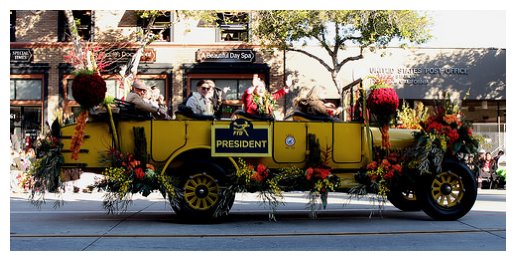

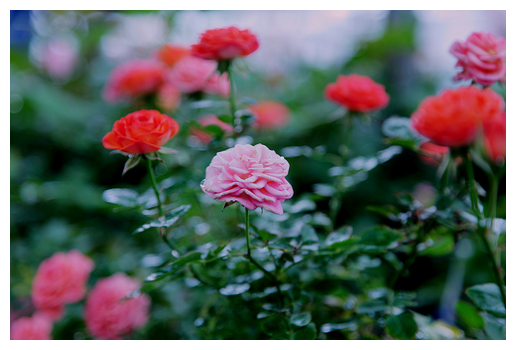

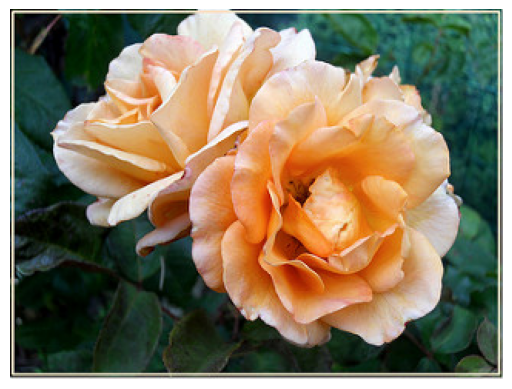

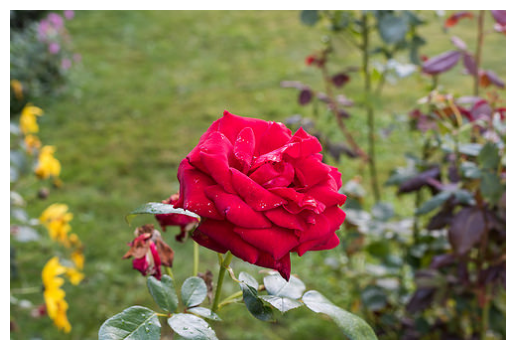

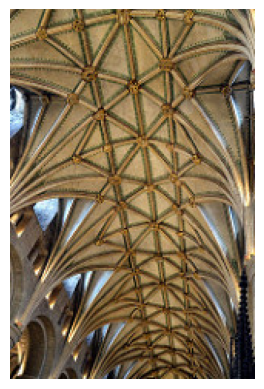

In [34]:
import matplotlib.pyplot as plt

def show_image(image_tensor):
    image = image_tensor.numpy()
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    
for i in range(5):
    show_image(dataset[i])

## 실습

scikit-learn에서 California Housing 데이터셋을 불러온 뒤, 입력은 `input_data`에 저장하고 타깃은 `target_data`에 저장하세요.이때 `input_data`와 `target_data` 모두 데이터 타입은 float32로 지정해주세요.

California Housing 데이터셋의 입력과 타깃을 짝지어 관리하는 커스텀 Dataset 클래스 `CaliforniaHousingDataset`을 정의해 주세요.
   
코드 마지막 부분에서 0번 인덱스 데이터를 출력했을 때 다음과 같은 결과가 나와야 합니다.



```
(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))
```

In [35]:
from sklearn import datasets

cal_housing = datasets.fetch_california_housing()
input_data = cal_housing.data.astype(np.float32)
target_data = cal_housing.target.astype(np.float32)

In [36]:
class CaliforniaHousingDataset(Dataset):
	def __init__(self, input_data, target_data):
		self.input_data = input_data
		self.target_data = target_data
	
	def __len__(self):
		return len(self.input_data)
	
	def __getitem__(self, index):
		input_tensor = torch.tensor(self.input_data[index])
		target_tensor = torch.tensor(self.target_data[index])
		return input_tensor, target_tensor

In [38]:
dataset = CaliforniaHousingDataset(input_data, target_data)
print(dataset[0])

(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))


In [39]:
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
    
    def __len__(self):
        return len(self.input_data)
    
    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [40]:
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

In [ ]:
train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size : train_size + val_size]
val_targets = target_data[train_size : train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

In [43]:
train_dataset = AbaloneDataset(train_inputs, train_targets)
val_dataset = AbaloneDataset(val_inputs, val_targets)
test_dataset = AbaloneDataset(test_inputs, test_targets)

In [46]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

2656
332
332


In [47]:
from torch.utils.data import random_split
train, val, test = random_split(input_data, [train_size, val_size, len(input_data) - train_size - val_size])

print(len(train), len(val), len(test))

2656 332 332


In [ ]:
# 스케일러를 사용해 입력 데이터를 표준화합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_inputs)

StandardScaler()

In [49]:
train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [51]:
print(train_inputs_scaled.mean(axis=0))
print(train_inputs_scaled.std(axis=0))


[ 7.1812827e-09 -1.5798822e-08  6.1040901e-09  5.0268976e-09
 -7.1812827e-09 -7.1812827e-09  4.3087693e-09]
[1. 1. 1. 1. 1. 1. 1.]


In [52]:
print(val_inputs_scaled.mean(axis=0))
print(val_inputs_scaled.std(axis=0))

[-0.06474356 -0.05857919 -0.04376053 -0.0598059  -0.04299596 -0.0507045
 -0.06344681]
[1.0586624  1.0502188  0.9332286  0.9754747  0.9662012  0.97565734
 0.9900307 ]


In [53]:
print(test_inputs_scaled.mean(axis=0))
print(test_inputs_scaled.std(axis=0))

[-0.01608398 -0.01165531 -0.00663563 -0.01595608 -0.03111611 -0.00694578
 -0.0020658 ]
[1.0259299 1.0084702 0.8975052 1.0149662 1.0187284 1.019391  1.0076604]


In [54]:
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)

In [55]:
train_data = train_dataset[0]
print(train_data[0], train_data[1])



tensor([-0.7383, -0.7264, -0.6794, -1.0061, -1.0062, -0.9373, -1.0149]) tensor(7.)


In [62]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data, scaler=None):
        self.input_data = input_data
        self.target_data = target_data
        self.scaler = scaler
    
    def __len__(self):
        return len(self.input_data)
    
    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor
    
    def scale_transfor(self, inputs):
        if self.scaler:
            self.input_data = self.scaler.transform(inputs)
        else:
            self.input_data = inputs
            
    def inverse_transform(self, scaled_data):
        if self.scaler:
            return self.scaler.inverse_transform(scaled_data)
        else:
            return scaled_data

In [63]:
scaler = StandardScaler()
scaler.fit(train_inputs)

train_dataset = AbaloneDataset(train_inputs, train_targets, scaler)

In [61]:
train_dataset[0]

(tensor([0.4350, 0.3350, 0.1100, 0.3340, 0.1355, 0.0775, 0.0965]), tensor(7.))

In [64]:
train_dataset.inverse_transform([train_dataset[0][0]])

array([[0.57590116, 0.44060479, 0.1442645 , 0.99261154, 0.38950004,
        0.1893377 , 0.25237315]])

In [67]:
train_dataloader = DataLoader(train_dataset, batch_size=8)

for train_batch in train_dataloader:
	inputs, targets = train_batch
	print(inputs, targets)
	break


tensor([[0.4350, 0.3350, 0.1100, 0.3340, 0.1355, 0.0775, 0.0965],
        [0.5850, 0.4500, 0.1250, 0.8740, 0.3545, 0.2075, 0.2250],
        [0.6550, 0.5100, 0.1600, 1.0920, 0.3960, 0.2825, 0.3700],
        [0.5450, 0.4250, 0.1250, 0.7680, 0.2940, 0.1495, 0.2600],
        [0.5450, 0.4200, 0.1300, 0.8790, 0.3740, 0.1695, 0.2300],
        [0.5700, 0.4500, 0.1450, 0.7510, 0.2825, 0.2195, 0.2215],
        [0.4700, 0.3600, 0.1300, 0.4720, 0.1820, 0.1140, 0.1500],
        [0.6100, 0.4500, 0.1900, 1.0805, 0.5170, 0.2495, 0.2935]]) tensor([ 7.,  6., 14., 16., 13., 10., 10., 10.])


In [68]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

for train_batch in train_dataloader:
	inputs, targets = train_batch
	print(inputs, targets)
	break



tensor([[0.5500, 0.3800, 0.1650, 1.2050, 0.5430, 0.2940, 0.3345],
        [0.2900, 0.2250, 0.0750, 0.1520, 0.0710, 0.0590, 0.0450],
        [0.5800, 0.4500, 0.1700, 0.9705, 0.4615, 0.2320, 0.2480],
        [0.6200, 0.4900, 0.1900, 1.2180, 0.5455, 0.2965, 0.3550],
        [0.6350, 0.5000, 0.1650, 1.4595, 0.7050, 0.2645, 0.3900],
        [0.3600, 0.2700, 0.0900, 0.2320, 0.1200, 0.0435, 0.0560],
        [0.5550, 0.4550, 0.1700, 0.8435, 0.3090, 0.1905, 0.3000],
        [0.6150, 0.5050, 0.1900, 1.4030, 0.6715, 0.2925, 0.3650]]) tensor([10.,  9.,  9., 13.,  9.,  8., 15.,  8.])


In [69]:
len(val_dataset)

332

In [71]:
val_dataloader = DataLoader(val_dataset, batch_size=300)

for val_batch in val_dataloader:
	inputs, targets = val_batch
	print(inputs.shape, targets.shape)


torch.Size([300, 7]) torch.Size([300])
torch.Size([32, 7]) torch.Size([32])


## 실습

California Housing 데이터를 배치 형태로 불러올 수 있도록 `DataLoader`를 만들어 보겠습니다.

주어진 코드에는 `CaliforniaHousingDataset` 클래스가 정의되어 있고요. 이어서 California Housing 데이터를 학습, 검증, 테스트용으로 분할한 뒤, 각각 학습 데이터 기준으로 피처를 표준화했습니다. 학습, 검증, 테스트용 `CaliforniaHousingDataset` 객체까지 만들어져 있습니다.

주어진 코드를 바탕으로 학습, 검증, 테스트용 `DataLoader` 객체를 만들어 주세요. `DataLoader` 객체를 만들 때는 아래 표에 나온 대로 배치 크기와 데이터 셔플 여부를 설정해 주시기 바랍니다.

| DataLoader | 변수 이름 | 배치 크기 | 데이터 셔플 |
| --- | --- | --- | --- |
| 학습 | `train_dataloader` | 16 | O |
| 검증 | `val_dataloader` | 4 | X |
| 테스트 | `test_dataloader` | 4 | X |

 실습 결과  

코드 마지막 부분에서 검증 데이터의 첫 번째 배치를 출력했을 때 다음과 같은 결과가 나와야 합니다.

```
inputs
tensor([[-0.6217,  0.3693,  0.1410, -0.0975, -0.1100,  0.1075,  1.1817, -1.0864],
        [-0.0869, -0.9600,  0.0141, -0.1540,  0.3140,  0.0764,  1.2248, -1.0864],
        [-0.8986, -0.0999, -0.2586, -0.1207,  0.2424,  0.0185,  1.2201, -1.0864],
        [-0.8952,  0.6039, -0.1788, -0.0965, -0.7898, -0.1050,  1.2201, -1.0864]])

targets
tensor([1.6560, 1.2610, 0.9440, 0.9190])
```

In [72]:
# 데이터 불러오기
cal_housing = datasets.fetch_california_housing()
input_data = cal_housing.data.astype(np.float32)
target_data = cal_housing.target.astype(np.float32)


# CaliforniaHousingDataset 클래스 정의
class CaliforniaHousingDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

# 학습/검증/테스트 분할
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size:train_size + val_size]
val_targets = target_data[train_size:train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

# 학습 입력 데이터 기준 표준화
scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

# Dataset 객체 생성
train_dataset = CaliforniaHousingDataset(train_inputs_scaled, train_targets)
val_dataset = CaliforniaHousingDataset(val_inputs_scaled, val_targets)
test_dataset = CaliforniaHousingDataset(test_inputs_scaled, test_targets)

# DataLoader 객체 생성
# 여기에 코드를 작성하세요.
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4)
test_dataloader = DataLoader(test_dataset, batch_size=4)

# 테스트 코드
for val_data in val_dataloader:
    print(f'inputs\n{val_data[0]}\n')
    print(f'targets\n{val_data[1]}')
    break

inputs
tensor([[-0.6217,  0.3693,  0.1410, -0.0975, -0.1100,  0.1075,  1.1817, -1.0864],
        [-0.0869, -0.9600,  0.0141, -0.1540,  0.3140,  0.0764,  1.2248, -1.0864],
        [-0.8986, -0.0999, -0.2586, -0.1207,  0.2424,  0.0185,  1.2201, -1.0864],
        [-0.8952,  0.6039, -0.1788, -0.0965, -0.7898, -0.1050,  1.2201, -1.0864]])

targets
tensor([1.6560, 1.2610, 0.9440, 0.9190])
